# Entendimento do problema

- Problema:
Margem de lucro pequena na venda de casas.

- Causa:
Os custos de um analista para precificar preços de casas é alto.

- Objetivo:
Diminuir a precificação feita por analistas.


- Converter o problema de negócio em um problema de dados (preciso analisar os dados):
Prever o valor dado as características do imóvel (problema de regressão)

# Entendimento dos dados

- Onde estão os dados?
  - Existem?
  - Onde estão? (quais fontes: BD relacional, arquivos, ...)
- Tenho acesso a esses dados?
  - Adquirir permissões para acesso.
  - Conexão aos dados.

In [2]:
from sklearn.datasets import load_boston

In [3]:
import pandas as pd

In [4]:
casas = pd.concat([pd.DataFrame(load_boston().data, columns=load_boston().feature_names), pd.DataFrame(load_boston().target, columns=['price'])], axis=1)

In [5]:
casas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Para entender os dados:
- Na prática: busca de dados + documentação + perguntas a quem sabe dos dados (DBA, analista de negócio, engenheiro de dados, diretor, etc...)
- No caso da aula: documentação dos dados em https://scikit-learn.org/stable/datasets/toy_dataset.html, https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html, google tradutor, etc...

In [6]:
colunas = {'CRIM': 'crime_per_capita', 'ZN': 'lotes_residenciais_acima_2300', 'INDUS': 'acres_lotes_nao_varejistas',
 'CHAS': 'fronteira_rio', 'NOX': 'concentracao_oxido_nitrico', 'RM': 'numero_medio_quartos',
 'AGE': 'proporcao_casas_antigas', 'DIS': 'distancia_empregos', 'RAD': 'acessibilidade_rodovias',
 'TAX': 'proporcao_imposto', 'PTRATIO': 'alunos_por_professores', 'B': 'proporcao_negras',
 'LSTAT': 'status_inferior_populacao', 'price': 'preco'}
casas = casas.rename(colunas, axis=1)
casas

,crime_per_capita,lotes_residenciais_acima_2300,acres_lotes_nao_varejistas,fronteira_rio,concentracao_oxido_nitrico,numero_medio_quartos,proporcao_casas_antigas,distancia_empregos,acessibilidade_rodovias,proporcao_imposto,alunos_por_professores,proporcao_negras,status_inferior_populacao,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crime_per_capita               506 non-null    float64
 1   lotes_residenciais_acima_2300  506 non-null    float64
 2   acres_lotes_nao_varejistas     506 non-null    float64
 3   fronteira_rio                  506 non-null    float64
 4   concentracao_oxido_nitrico     506 non-null    float64
 5   numero_medio_quartos           506 non-null    float64
 6   proporcao_casas_antigas        506 non-null    float64
 7   distancia_empregos             506 non-null    float64
 8   acessibilidade_rodovias        506 non-null    float64
 9   proporcao_imposto              506 non-null    float64
 10  alunos_por_professores         506 non-null    float64
 11  proporcao_negras               506 non-null    float64
 12  status_inferior_populacao      506 non-null    flo

- todos os dados são ponto flutuante (variáveis contínuas)
- Fronetira do rio: dummy, indicador=> provavelmente deveria ser 0 e 1...

In [9]:
casas.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_per_capita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
lotes_residenciais_acima_2300,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
acres_lotes_nao_varejistas,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
fronteira_rio,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
concentracao_oxido_nitrico,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
numero_medio_quartos,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
proporcao_casas_antigas,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
distancia_empregos,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
acessibilidade_rodovias,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
proporcao_imposto,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<AxesSubplot:>

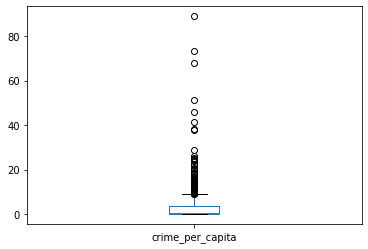

In [10]:
casas['crime_per_capita'].plot(kind='box')

<AxesSubplot:>

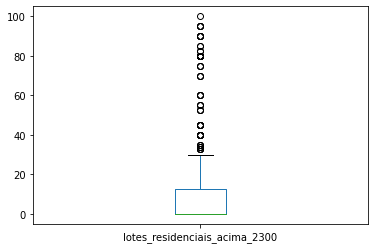

In [11]:
casas['lotes_residenciais_acima_2300'].plot(kind='box')

<AxesSubplot:>

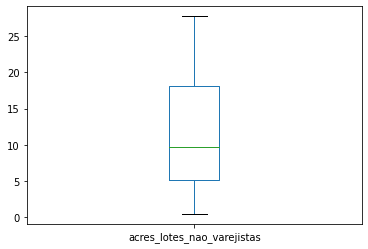

In [12]:
casas['acres_lotes_nao_varejistas'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

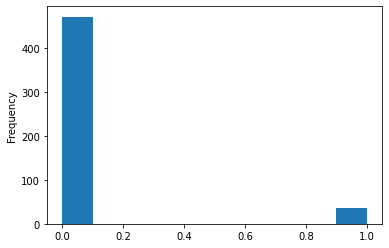

In [13]:
casas['fronteira_rio'].plot(kind='hist')

In [14]:
casas['fronteira_rio'] = casas['fronteira_rio'].astype(int)

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='fronteira_rio'>

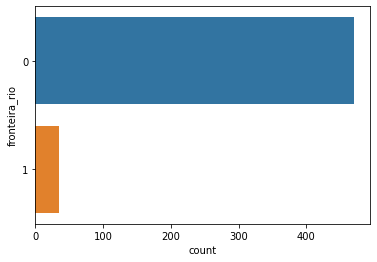

In [17]:
sns.countplot(y='fronteira_rio', data=casas)

<AxesSubplot:>

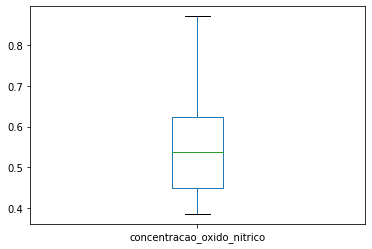

In [18]:
casas['concentracao_oxido_nitrico'].plot(kind='box')

Tarefa:
- Desenhar o histograma para cada variável anterior.
- Fazer histograma e boxplot (e interpretar) para cada uma.

<AxesSubplot:>

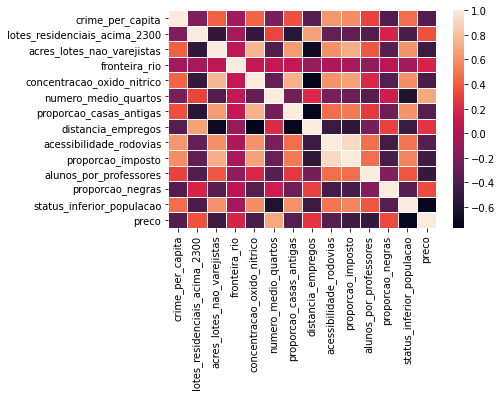

In [19]:
sns.heatmap(casas.corr(), linewidths=0.5)

# Modelagem

Lembrando: preparação e modelagem tem interação. Posso testar preparações diferentes em modelos e compará-los

In [20]:
X = casas.drop('preco', axis=1)
y = casas['preco']

In [21]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=92)  

In [22]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 3) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo

KNeighborsRegressor(n_neighbors=3)

In [23]:
y_predito = kvizinhos.predict(X_teste)

In [24]:
# Por que acurácia não funciona (número além de tudo são float)
(y_predito == y_teste).sum() / y_teste.size

0.00980392156862745

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
real = [100, 170]
previsto = [120, 150]
mean_squared_error(real, previsto)

400.0

In [27]:
real = [102.58, 170.98]
previsto = [120.78, 151.58]
mean_squared_error(real, previsto)

353.7999999999996

In [28]:
y_teste.size

102

In [29]:
mean_squared_error(y_teste, y_predito)

42.25339869281044

In [30]:
import math
math.sqrt(42.25)

6.5

In [31]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 5) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo
y_predito = kvizinhos.predict(X_teste)
mean_squared_error(y_teste, y_predito)

44.8910862745098

In [32]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 7) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo
y_predito = kvizinhos.predict(X_teste)
mean_squared_error(y_teste, y_predito)

48.2490056022409

In [33]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 10) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo
y_predito = kvizinhos.predict(X_teste)
mean_squared_error(y_teste, y_predito)

49.62236274509804

In [34]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 2) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo
y_predito = kvizinhos.predict(X_teste)
mean_squared_error(y_teste, y_predito)

42.998333333333335

In [35]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 1) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo
y_predito = kvizinhos.predict(X_teste)
mean_squared_error(y_teste, y_predito)

48.080882352941174

In [36]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 100) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo
y_predito = kvizinhos.predict(X_teste)
mean_squared_error(y_teste, y_predito)

67.94183988235295

Qual menor erro?
k = 3 (n_neighbors)

Cuidado com **overfitting**. Na busca pelo menor erro, para quando o anterior é próximo do seguinte

Modelo final: Menor erro sem overfitting.

In [37]:
from sklearn.neighbors import KNeighborsRegressor # Escolha modelo
kvizinhos = KNeighborsRegressor(n_neighbors = 3) # Instanciar modelo (escolher hiper parâmetros) n_neighbors = k
kvizinhos.fit(X_treino, y_treino) # Ajustar aprender modelo

KNeighborsRegressor(n_neighbors=3)

In [38]:
casa_nova = [[10.0,0.001,18.0,1.0,0.358,3.0,20.0,8.10,0.5,150.0,10.0,450.00,2.00]]

In [39]:
kvizinhos.predict(casa_nova)

array([36.16666667])

# Regração Linear

In [46]:
from sklearn.linear_model import LinearRegression
regressao_linear = LinearRegression(normalize=True)
regressao_linear.fit(X_treino, y_treino)

LinearRegression(normalize=True)

In [47]:
y_predito = regressao_linear.predict(X_teste)

In [48]:
mean_squared_error(y_teste,y_predito)

22.838140077699638